# Assigment 10

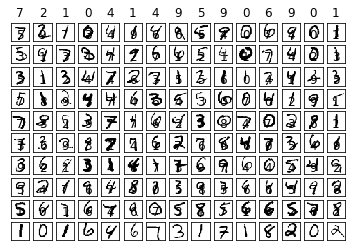

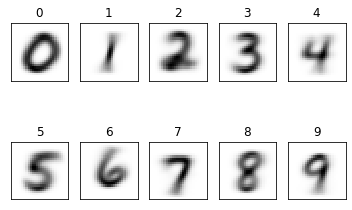

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

#
# plot first 150 images out of 10,000 with their labels
#
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)


#plt.show()

#
# plot the average image of all the images for each digit
#
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


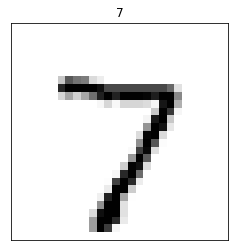

In [0]:
label       = list_label[0]
im_vector   = list_image[:, 0]
im_matrix   = im_vector.reshape((size_row, size_col))

plt.title(label)
plt.imshow(im_matrix, cmap='Greys', interpolation='None')

frame   = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [51]:
w = np.random.normal(0, 1, [785,10])
# print(w)

[[ 0.67416522  0.2704987  -1.14930255 ...  1.25033568 -0.83684796
   1.31403828]
 [-1.41455746  0.66138319  0.11044779 ...  0.00748839  0.08694026
   1.40110873]
 [ 0.38861903 -1.48109207 -0.43198363 ...  0.31093922 -0.16490437
   0.95682971]
 ...
 [-2.1148257  -2.23722765  0.22955333 ... -1.51166289  0.51466659
   0.17693221]
 [ 0.80501407  1.58559966 -0.77148838 ... -0.85203207 -1.31761842
   0.57375358]
 [-1.80246064  0.86877993  1.4581424  ...  0.31467575  1.42450932
  -1.13029678]]


In [14]:
def Dl_dw(x,h_,h,l):
  return (-l/h +(1-l)/(1-h))*((1/(1 + np.exp(-h_)))*(1-(1/(1 + np.exp(-h_)))))*(x) 

print('Function generated!')

Function generated!


In [62]:
for i in range(50,60):
  x = np.append(list_image[:,i],1)
  h_ = x.dot(w)
  h = 1/(1 + np.exp(-h_))
  print('Output: %d' % np.argmax(h))
  print('Actual Output: %d \n' % list_label[i])


Output: 0
Actual Output: 6 

Output: 0
Actual Output: 3 

Output: 0
Actual Output: 5 

Output: 0
Actual Output: 5 

Output: 0
Actual Output: 6 

Output: 0
Actual Output: 0 

Output: 0
Actual Output: 4 

Output: 1
Actual Output: 1 

Output: 0
Actual Output: 9 

Output: 5
Actual Output: 5 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [61]:
w = np.random.normal(0, 1, [785,10])

for iteration in range(100):
  for kk in range(1000):

    x = np.append(list_image[:, kk],1)
    h_ = x.dot(w)
    h = 1/(1 + np.exp(-h_))

    actual_l = np.zeros(10)
    actual_l[list_label[kk]] = 1

    # a = np.argmax(h)
    # h = np.zeros(10)
    # h[a] = 1

    # print(h)

    # print(actual_l)
    # sum_J = 0
    # for i in range(10):
    #   sum_J += -actual_l[i]*np.log(h[i]) - (1-actual_l[i])*np.log(1-h[i])
    dl_dh = np.zeros(10)

    for i in range(10):
      if actual_l[i] == 0:
        dl_dh[i] = (1.0 - actual_l[i])/(1.0 - h[i])

      if actual_l[i] == 1:
        dl_dh[i] = (- actual_l[i])/(h[i]+0.001)


    # dl_dh = (-actual_l/h + (1.0-actual_l)/(1.0-h))
    dl_dh = np.reshape(dl_dh,(-1,10))

    dh_dhh = (1/(1 + np.exp(-h_)))*(1 - (1/(1 + np.exp(-h_))))
    dh_dhh = np.reshape(dh_dhh,(-1,10))

    # print(dl_dh)
    # print(dh_dhh)


    sigma = dl_dh*dh_dhh
    # print(sigma)

    x = np.reshape(x,(len(x),-1))

    dl_dw = x.dot(sigma)

    # print(np.shape(dl_dw))
    # print(np.shape(w))

    w = w - 0.01*np.sign(dl_dw)

print('trained')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in exp


trained


In [12]:
aa = [1,2]
aa = np.reshape(aa,(-1,len(aa)))
bb = [1,2,3]
bb = np.reshape(bb,(-1,len(bb)))
# print(aa)
# print(bb)

bb = np.transpose(bb)
# print(bb)

cc = bb.dot(aa)
# print(cc)

# print(dl_dh)
# print(dh_dhh)

# backpropagate
# print(np.shape(list_image))
# print(l)


mm = [[1],[2],[3]]
print(mm)

nn = [[4],[5],[6]]
nn = np.array(nn)
print(nn)


oo = nn.dot(np.transpose(mm))
print(oo)

[[1], [2], [3]]
[[4]
 [5]
 [6]]
[[ 4  8 12]
 [ 5 10 15]
 [ 6 12 18]]


In [0]:
z = 0
y = []

for i in range(10):
  c,x,x_sum = 0,0,0
  for j in range(6000):
    if list_label[j] == i:
      c += 1
      w1 = np.random.rand(196,784)
      w2 = np.random.rand(784,10)
      s = list_image[:,j]
      x1 = np.multiply(s,w1)
      z = np.divide(1,(1 + np.exp(-x1)))
      x2 = np.multiply(z,w2)
      y = np.divide(1,(1 + np.exp(-x2)))
      

In [0]:
np.shape(z)

(196, 784)